<a href="https://colab.research.google.com/github/LucianaMiyuki/Python/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com Pandas 
Trilha 2 - Paradigmas de Linguagem de programação em Ciência de Dados
Mackenzie 2021

In [ ]:
import pandas as pd
import numpy as np

# Criando um pd.Series e pd.DataFrame

In [ ]:
# Séries
students_names = pd.Series(['Angela','Carol','Debora'])
age = pd.Series([18,19,20])

In [ ]:
students_names

0    Angela
1     Carol
2    Debora
dtype: object

In [ ]:
age

0    18
1    19
2    20
dtype: int64

In [ ]:
# Dataframe
students = pd.DataFrame({'Student Name': students_names, 'Age':age})

In [ ]:
students

,Student Name,Age
0,Angela,18
1,Carol,19
2,Debora,20


# Formatos de arquivos que podem ser lidos no Pandas:

csv --> pd.read_csv()

json --> pd.read_jason()

xlsx --> pd.read_excel()

hdf --> pd.read_hdf()

sql --> pd.read_sql()


In [ ]:
tips = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/tips.csv')
tips.head()  # lista as primeiras linhas do arquivo importado

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# número de linhas e colunas
tips.shape

(244, 7)

In [ ]:
# número de linhas
len(tips)

244

In [ ]:
# lista colunas
tips.columns.to_list()

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
# tipo dos atributos
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [ ]:
# describe() exibe informações estatísticas sumarizadas dos dados.
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [ ]:
print(tips.tip) # ou print(tips['tip'])

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


In [ ]:
tip_series = tips['tip']
print(f'Média das gorjetas: USD {tip_series.mean() :.2f} e Total das gorjetas: USD {tip_series.sum() :.2f}')

Média das gorjetas: USD 3.00 e Total das gorjetas: USD 731.58


In [ ]:
dias = tips.day
dias = dias.to_list()
dias.count('Sat')

87

In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
select_tips = tips[['total_bill','tip','size']]
select_tips.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [ ]:
# Seleciona os campos com menores falores no campo total_bill
tips.nsmallest(5,'total_bill')

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2


In [ ]:
# Os 3 registros com maiores valores no total_bill.
tips_top3 = tips.nlargest(3,'total_bill')
tips_top3


,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


In [ ]:
dolar_real_rate = 5.8
tips['total_bill'] = tips['total_bill'] * dolar_real_rate
tips['tip'] = tips['tip'] * dolar_real_rate

tips['total_bill_minus_tips'] = tips['total_bill'] - tips['tip']
tips['bill_by_head'] = tips['total_bill'] / tips['size']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_minus_tips,bill_by_head
0,98.542,5.858,Female,No,Sun,Dinner,2,92.684,49.271000
1,59.972,9.628,Male,No,Sun,Dinner,3,50.344,19.990667
2,121.858,20.300,Male,No,Sun,Dinner,3,101.558,40.619333
3,137.344,19.198,Male,No,Sun,Dinner,2,118.146,68.672000
4,142.622,20.938,Female,No,Sun,Dinner,4,121.684,35.655500


In [ ]:
tips_nao_fumantes = tips[tips.smoker == 'No']
tips_nao_fumantes

,total_bill,tip,sex,smoker,day,time,size,total_bill_minus_tips,bill_by_head
0,98.542,5.858,Female,No,Sun,Dinner,2,92.684,49.271000
1,59.972,9.628,Male,No,Sun,Dinner,3,50.344,19.990667
2,121.858,20.300,Male,No,Sun,Dinner,3,101.558,40.619333
3,137.344,19.198,Male,No,Sun,Dinner,2,118.146,68.672000
4,142.622,20.938,Female,No,Sun,Dinner,4,121.684,35.655500
...,...,...,...,...,...,...,...,...,...
235,58.406,7.250,Male,No,Sat,Dinner,2,51.156,29.203000
238,207.814,27.086,Female,No,Sat,Dinner,3,180.728,69.271333
239,168.374,34.336,Male,No,Sat,Dinner,3,134.038,56.124667
242,103.356,10.150,Male,No,Sat,Dinner,2,93.206,51.678000


In [ ]:
tips_fumantes = tips [tips.smoker == 'Yes']
tips_fumantes

,total_bill,tip,sex,smoker,day,time,size,total_bill_minus_tips,bill_by_head
56,220.458,17.400,Male,Yes,Sat,Dinner,4,203.058,55.1145
58,65.192,10.208,Male,Yes,Sat,Dinner,2,54.984,32.5960
60,117.682,18.618,Male,Yes,Sat,Dinner,2,99.064,58.8410
61,80.098,11.600,Male,Yes,Sat,Dinner,2,68.498,40.0490
62,63.916,11.484,Male,Yes,Sat,Dinner,2,52.432,31.9580
...,...,...,...,...,...,...,...,...,...
234,90.074,17.400,Male,Yes,Sat,Dinner,2,72.674,45.0370
236,73.080,5.800,Male,Yes,Sat,Dinner,2,67.280,36.5400
237,190.414,6.786,Male,Yes,Sat,Dinner,2,183.628,95.2070
240,157.644,11.600,Female,Yes,Sat,Dinner,2,146.044,78.8220


In [ ]:
print(f'Percentual de Clientes Fumantes {len(tips_fumantes) / len(tips) :.2f} %')

Percentual de Clientes Fumantes 0.38 %


In [ ]:
# Verifica se a média de gorjetas de fumantes é maior do que de não fumantes.
tips[tips.smoker == 'Yes']['tip'].mean() > tips[tips.smoker == 'No']['tip'].mean()

True

In [ ]:
# Verifica se mulheres dão as maiores gorjetas. Resposta é não.
tips[tips.sex == 'Female']['tip'].mean() > tips[tips.sex == 'Male']['tip'].mean()

False

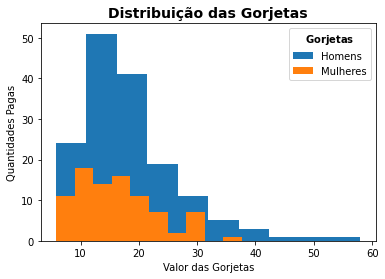

In [ ]:
import matplotlib.pyplot as plt
plt.hist(tips[tips.sex == 'Male']['tip'], label='Homens')
plt.hist(tips[tips.sex == 'Female']['tip'], label='Mulheres')

plt.xlabel('Valor das Gorjetas')
plt.ylabel('Quantidades Pagas')
plt.title('Distribuição das Gorjetas', fontsize=14, weight='bold')
plt.legend(title='$\\bf{Gorjetas}$')
plt.show()

# Funcionamento do GroupBy


In [ ]:
# source: https://jakevdp.github.io.PythonDataScienceHandbook/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def draw_dataframe(df, loc=None, width=None, ax=None, linestyle=None, textstyle=None):
  loc = loc or [0,0]
  widt = width or 1

  x,y = loc

  if ax is None:
    ax = plt.gca()

  ncols = len(df.columns) + 1
  nrows = len(df.index) + 1

  dx = dy = width / ncols

  if linestyle is None:
    linestyle = {'color':'black'}  

  if textstyle is None:
    textstyle = {'size': 12}    

  textstyle.update({'ha':'center','va':'center'})    

  #draw vertical lines
  for i in range(ncols + 1):
    plt.plot(2 * [x + i * dx], [y,y + dy * nrows], **linestyle)

  #draw horizontal lines
  for i in range(nrows + 1):
    plt.plot([x, x + dx * ncols], 2 * [y + i * dy], **linestyle)

  # Create index labels
  for i in range(nrows - 1):
    plt.text(x + 0.5 * dx, y + (i + 0.5) * dy,
             str(df.index[::-1][i]), **textstyle)  
  
  # Create column labels
  for i in range(ncols - 1):
    plt.text(x + (i + 1.5) * dx, y + (nrows - 0.5) * dy,
             str(df.columns[i]), style='italic', **textstyle)

  # Add index label
  if df.index.name:
    plt.text(x + 0.5 * dx, y + (nrows - 0.5) * dy,
             str(df.index.name), style='italic', **textstyle)

  # Insert data
  for i in range(nrows - 1):
    for j in range(ncols - 1):
      plt.text(x + (j + 1.5) * dx,
               y + (i + 0.5) * dy,
               str(df.values[::-1][i,j]), **textstyle)      

  #------------------------------------------------------
  # Draw figure
  import pandas as pd
  df = pd.DataFrame({'data':[1,2,3,4,5,6]},
                    index=['A','B','C','A','B','C'])
  df.index.name = 'key'

  fig = plt.figure(figsize=(8,6), facecolor='white')
  ax = plt.axes([0,0,1,1])

  ax.axis('off')

  draw_dataframe(df, [0,0])

  for y,ind in zip([3,1,-1], 'ABC'):
    split = df[df.index == ind]
    draw_dataframe(split, [2,y])

    sum = pd.DataFrame(split.sum()).T
    sum.index = [ind]
    sum.index.name = 'key'
    sum.columns = ['data']
    draw_dataframe(sum,[4,y + 0,25])

  result = df.groupby(df.index).sum()
  draw_dataframe(result,[6,0.75])

  style = dict(fontsize=14, ha='center', weight='bold')
  plt.text(0.5, 3.6, "Input", **style)
  plt.text(2.5, 4.6, "Split", **style)
  plt.text(4.5, 4.35, "Apply (sum)", **style)
  plt.text(6.5, 2.85, "Combine", **style)

  arrowprops = dict(facecolor='black', width=1, headwidth=6)
  plt.annotate('',(1.8,3.6),(1.2, 2.8), arrowprops=arrowprops)
  plt.annotate('',(1.8,1.75),(1.2, 1.75), arrowprops=arrowprops)
  plt.annotate('',(1.8,-0.1),(1.2, 0.7), arrowprops=arrowprops)

  plt.annotate('',(3.8,3.8),(3.2, 3.8), arrowprops=arrowprops)
  plt.annotate('',(3.8,-0.75),(3.2, 1.75), arrowprops=arrowprops)
  plt.annotate('',(3.8,-0.3),(3.2, -0.1), arrowprops=arrowprops)

  plt.annotate('',(5.8,2.8),(5.2, 3.6), arrowprops=arrowprops)
  plt.annotate('',(5.8,1.75),(5.2, 1.75), arrowprops=arrowprops)
  plt.annotate('',(5.8,0.7),(5.2, -0.1), arrowprops=arrowprops)

  plt.axis('equal')
  plt.ylim(-1.5,5);

  fig.savefig('03.08-split-apply-combine.png')

  


In [ ]:
display(df.groupby(df.index).sum())


,data
A,5
B,7
C,9


In [ ]:
display(df.groupby(df.index).mean())

,data
A,2.5
B,3.5
C,4.5


In [ ]:
display(df.groupby(df.index).std())

,data
A,2.12132
B,2.12132
C,2.12132


In [ ]:
display(df.groupby(df.index).min())

,data
A,1
B,2
C,3


In [ ]:
display(df.groupby(df.index).agg(['mean','std','min']))

data             
  mean      std min
A  2.5  2.12132   1
B  3.5  2.12132   2
C  4.5  2.12132   3

In [ ]:
pedidos = pd.DataFrame({'Pedido': pd.Series([1,1,1,2,2,2,2,3,3]),
                        'Itens': pd.Series(['Tênis Corrida','Tênis Caminhada', 'Camiseta','Tênis Caminhada','Camiseta','Boné','Keds','Tênis Caminhada','Camiseta']),
                        'Preço Unidade':pd.Series([300,250,90,250,90,60,250,250,90]),
                        'Quantidade': pd.Series([1,2,3,2,1,1,3,2,1])})

pedidos

,Pedido,Itens,Preço Unidade,Quantidade
0,1,Tênis Corrida,300,1
1,1,Tênis Caminhada,250,2
2,1,Camiseta,90,3
3,2,Tênis Caminhada,250,2
4,2,Camiseta,90,1
5,2,Boné,60,1
6,2,Keds,250,3
7,3,Tênis Caminhada,250,2
8,3,Camiseta,90,1


In [ ]:
display(pedidos.groupby('Pedido').agg(['mean','std','min']))

Preço Unidade                 Quantidade              
                mean         std min       mean       std min
Pedido                                                       
1         213.333333  109.696551  90       2.00  1.000000   1
2         162.500000  101.775898  60       1.75  0.957427   1
3         170.000000  113.137085  90       1.50  0.707107   1

In [ ]:
display(pedidos.groupby('Pedido').max())

,Itens,Preço Unidade,Quantidade
Pedido,,,
1,Tênis Corrida,300,3
2,Tênis Caminhada,250,3
3,Tênis Caminhada,250,2


In [ ]:
display(pedidos.groupby('Itens')['Quantidade'].agg(['mean','std','min','count']))

,mean,std,min,count
Itens,,,,
Boné,1.000000,NaN,1,1
Camiseta,1.666667,1.154701,1,3
Keds,3.000000,NaN,3,1
Tênis Caminhada,2.000000,0.000000,2,3
Tênis Corrida,1.000000,NaN,1,1


In [ ]:
display(pedidos.groupby('Itens').agg(['min','max']))

Pedido     Preço Unidade      Quantidade    
                   min max           min  max        min max
Itens                                                       
Boné                 2   2            60   60          1   1
Camiseta             1   3            90   90          1   3
Keds                 2   2           250  250          3   3
Tênis Caminhada      1   3           250  250          2   2
Tênis Corrida        1   1           300  300          1   1

In [ ]:
display(pedidos.groupby(['Itens','Pedido']).agg(['min','max']))

Preço Unidade      Quantidade    
                                 min  max        min max
Itens           Pedido                                  
Boné            2                 60   60          1   1
Camiseta        1                 90   90          3   3
                2                 90   90          1   1
                3                 90   90          1   1
Keds            2                250  250          3   3
Tênis Caminhada 1                250  250          2   2
                2                250  250          2   2
                3                250  250          2   2
Tênis Corrida   1                300  300          1   1

## --> Acessando chaves e valores dos grupos

O método groupby retorna um objeto do tipo DataFrameGroupBy, e não um DataFrame. 
Essa é uma grande diferença entre as funções no Pandas e no SQL. Os métodos de 
DataFrame não podem ser aplicados a um objeto do tipo DataFrameGroupBy, enquanto, 
na SQL, um SELECT com GROUPY retorna uma tabela, com todas as operações de tabela 
aplicáveis. 

In [ ]:
# Retorna o endereço na memória
pedidos.groupby('Itens')

In [ ]:
group_itens = pedidos.groupby('Itens')
print(group_itens)
print(group_itens.groups)
print(group_itens.groups.keys())
print(group_itens.groups.values())

{'Boné': [5], 'Camiseta': [2, 4, 8], 'Keds': [6], 'Tênis Caminhada': [1, 3, 7], 'Tênis Corrida': [0]}
dict_keys(['Boné', 'Camiseta', 'Keds', 'Tênis Caminhada', 'Tênis Corrida'])
dict_values([Int64Index([5], dtype='int64'), Int64Index([2, 4, 8], dtype='int64'), Int64Index([6], dtype='int64'), Int64Index([1, 3, 7], dtype='int64'), Int64Index([0], dtype='int64')])


## --> Iterando sobre grupos

In [ ]:
for chave in pedidos.groupby('Itens').groups.keys():
  print(chave)

#ou
#for chave in grupos_itens.groups.keys():
#  print(chave)

Boné
Camiseta
Keds
Tênis Caminhada
Tênis Corrida


In [ ]:
for chave, grupo in pedidos.groupby('Itens'):
  print(chave)
  print(grupo)

Boné
   Pedido Itens  Preço Unidade  Quantidade
5       2  Boné             60           1
Camiseta
   Pedido     Itens  Preço Unidade  Quantidade
2       1  Camiseta             90           3
4       2  Camiseta             90           1
8       3  Camiseta             90           1
Keds
   Pedido Itens  Preço Unidade  Quantidade
6       2  Keds            250           3
Tênis Caminhada
   Pedido            Itens  Preço Unidade  Quantidade
1       1  Tênis Caminhada            250           2
3       2  Tênis Caminhada            250           2
7       3  Tênis Caminhada            250           2
Tênis Corrida
   Pedido          Itens  Preço Unidade  Quantidade
0       1  Tênis Corrida            300           1


In [ ]:
# total de quantidades por item
pedidos.groupby('Itens').Quantidade.sum()

#ou
#grupo_itens.Quantidade.sum()

Itens
Boné               1
Camiseta           5
Keds               3
Tênis Caminhada    6
Tênis Corrida      1
Name: Quantidade, dtype: int64

## --> Acessando os valores

In [ ]:
pedidos.groupby('Itens')[['Quantidade','Preço Unidade']].sum()

,Quantidade,Preço Unidade
Itens,,
Boné,1,60
Camiseta,5,270
Keds,3,250
Tênis Caminhada,6,750
Tênis Corrida,1,300


In [ ]:
pedidos.groupby('Itens')[['Quantidade','Preço Unidade']].sum()['Quantidade']

Itens
Boné               1
Camiseta           5
Keds               3
Tênis Caminhada    6
Tênis Corrida      1
Name: Quantidade, dtype: int64

In [ ]:
pedidos.groupby('Itens')[['Quantidade','Preço Unidade']].sum()['Quantidade'].mean()

3.2

Um artifício bastante prático que você pode empregar, se não estiver preocupado com 
o desempenho e o uso de recursos de memória das operações, é transformar seu 
agrupamento em um DataFrame para que possa aplicar as operações que já conhece 
diretamente para essa classe.


In [ ]:
df = pd.DataFrame(pedidos.groupby('Itens')[['Quantidade','Preço Unidade']].sum()).reset_index()
df.head()

,Itens,Quantidade,Preço Unidade
0,Boné,1,60
1,Camiseta,5,270
2,Keds,3,250
3,Tênis Caminhada,6,750
4,Tênis Corrida,1,300


# Combinações de dados

Muitas vezes, você pode estar lidando com mais de uma tabela ou conjunto de dados. 
Assim, operações para combinar esses dados são muito úteis.
Existem várias formas de combinar conjuntos de dados com Pandas. Aqui, vamos nos 
concentrar nas operações de concatenação e de junções (joins) de dados.

In [ ]:
class display(object):
  template = """<div style="float: left; padding: 10px;">
  <hr>
  <p style='font-family:"Courier New", Courier, monospace'>{0}</p><hr>{1}
  </div>"""
  def __init__(self, *args):
    self.args = args

  def _repr_html_(self):
    return '\n'.join(self.template.format(a,eval(a)._repr_html_()) for a in self.args)

  def __repr__(self):
    return '\n\n'.join(a + '\n' + repr(eval(a)) for a in self.args)

import pandas as pd

# Escola 1
df = pd.DataFrame({'Nome': ['Amélia', 'Denilson', 'Henrique'],
                   'Curso': ['Graduação','Graduação','Ensino Médio'],
                   'Idade': [34,25,17]})    

df2 = pd.DataFrame({'Nome': ['Beatriz', 'Anna'],
                   'Curso': ['Graduação','Ensino Médio'],
                   'Idade': [34,17],
                   'Ingresso':[2018,2020]}) 

# Preferências
df3 = pd.DataFrame({'Nome': ['Amélia', 'Denilson', 'Henrique','Beatriz', 'Anna'],
                   'Música': ['Rock','MPB','HipHop','Jazz','Jazz']})

display('df','df2','df3')

df
       Nome         Curso  Idade
0    Amélia     Graduação     34
1  Denilson     Graduação     25
2  Henrique  Ensino Médio     17

df2
      Nome         Curso  Idade  Ingresso
0  Beatriz     Graduação     34      2018
1     Anna  Ensino Médio     17      2020

df3
       Nome  Música
0    Amélia    Rock
1  Denilson     MPB
2  Henrique  HipHop
3   Beatriz    Jazz
4      Anna    Jazz

# Concatenação
Você pode concatenar tabelas de dados no sentido das linhas ou das colunas. O 
caso “feliz” nessas operações é quando o número de colunas das tabelas é o mesmo 
(concatenação no sentido das linhas) ou quando o número de linhas das tabelas é o 
mesmo (concatenação no sentido das colunas). 

In [ ]:
# Concatena linhas
pd.concat([df2,df3],axis=0)

,Nome,Curso,Idade,Ingresso,Música
0,Beatriz,Graduação,34.0,2018.0,NaN
1,Anna,Ensino Médio,17.0,2020.0,NaN
0,Amélia,NaN,NaN,NaN,Rock
1,Denilson,NaN,NaN,NaN,MPB
2,Henrique,NaN,NaN,NaN,HipHop
3,Beatriz,NaN,NaN,NaN,Jazz
4,Anna,NaN,NaN,NaN,Jazz


In [ ]:
df4 = df2[['Nome','Curso','Idade']]
display('df','df4',"pd.concat([df,df4])")

,Nome,Curso,Idade
0,Amélia,Graduação,34
1,Denilson,Graduação,25
2,Henrique,Ensino Médio,17
,Nome,Curso,Idade
0,Beatriz,Graduação,34
1,Anna,Ensino Médio,17
,Nome,Curso,Idade
0,Amélia,Graduação,34
1,Denilson,Graduação,25
2,Henrique,Ensino Médio,17


In [ ]:
# Concatena colunas
pd.concat([df,df2],axis=1 )

,Nome,Curso,Idade,Nome,Curso,Idade,Ingresso
0,Amélia,Graduação,34,Beatriz,Graduação,34.0,2018.0
1,Denilson,Graduação,25,Anna,Ensino Médio,17.0,2020.0
2,Henrique,Ensino Médio,17,NaN,NaN,NaN,NaN


In [ ]:
df5 = df3[['Música']].head(3)
display('df','df5',"pd.concat([df,df5],axis=1)")

df
       Nome         Curso  Idade
0    Amélia     Graduação     34
1  Denilson     Graduação     25
2  Henrique  Ensino Médio     17

df5
   Música
0    Rock
1     MPB
2  HipHop

pd.concat([df,df5],axis=1)
       Nome         Curso  Idade  Música
0    Amélia     Graduação     34    Rock
1  Denilson     Graduação     25     MPB
2  Henrique  Ensino Médio     17  HipHop

No caso de não termos as quantidades de linhas ou colunas iguais, conforme o sentido 
da combinação, os valores ausentes são preenchidos com NaN. 

In [ ]:
display('df','df2',"pd.concat([df,df2])")

df
       Nome         Curso  Idade
0    Amélia     Graduação     34
1  Denilson     Graduação     25
2  Henrique  Ensino Médio     17

df2
      Nome         Curso  Idade  Ingresso
0  Beatriz     Graduação     34      2018
1     Anna  Ensino Médio     17      2020

pd.concat([df,df2])
       Nome         Curso  Idade  Ingresso
0    Amélia     Graduação     34       NaN
1  Denilson     Graduação     25       NaN
2  Henrique  Ensino Médio     17       NaN
0   Beatriz     Graduação     34    2018.0
1      Anna  Ensino Médio     17    2020.0

Embora possa ser usada desse modo, tal operação pode gerar índices duplicados (como 
visto acima), caso os conjuntos de dados tenham índices únicos e distintos. Nessas 
condições, pode ser útil redefinir o índice, como abaixo.


In [ ]:
display('df','df2',"pd.concat([df,df2]).reset_index(drop=True)")

df
       Nome         Curso  Idade
0    Amélia     Graduação     34
1  Denilson     Graduação     25
2  Henrique  Ensino Médio     17

df2
      Nome         Curso  Idade  Ingresso
0  Beatriz     Graduação     34      2018
1     Anna  Ensino Médio     17      2020

pd.concat([df,df2]).reset_index(drop=True)
       Nome         Curso  Idade  Ingresso
0    Amélia     Graduação     34       NaN
1  Denilson     Graduação     25       NaN
2  Henrique  Ensino Médio     17       NaN
3   Beatriz     Graduação     34    2018.0
4      Anna  Ensino Médio     17    2020.0

Problema semelhante pode ocorrer com a concatenação de colunas de dados quando 
existem nomes de atributos (colunas) duplicados. 

In [ ]:
display('df','df2',"pd.concat([df,df2],axis=1)")

df
       Nome         Curso  Idade
0    Amélia     Graduação     34
1  Denilson     Graduação     25
2  Henrique  Ensino Médio     17

df2
      Nome         Curso  Idade  Ingresso
0  Beatriz     Graduação     34      2018
1     Anna  Ensino Médio     17      2020

pd.concat([df,df2],axis=1)
       Nome         Curso  Idade     Nome         Curso  Idade  Ingresso
0    Amélia     Graduação     34  Beatriz     Graduação   34.0    2018.0
1  Denilson     Graduação     25     Anna  Ensino Médio   17.0    2020.0
2  Henrique  Ensino Médio     17      NaN           NaN    NaN       NaN

Com o mesmo nome, os atributos não podem ser diferenciados; e precisamos usar a 
localização dos atributos se quisermos recuperá-los (uma forma que não detalharemos 
aqui).


In [ ]:
df3 = pd.concat([df,df2],axis=1)
df3['Nome']

,Nome,Nome
0,Amélia,Beatriz
1,Denilson,Anna
2,Henrique,NaN


In [ ]:
print(df3.loc[0][0])
print(df3.loc[0][3])

Amélia
Beatriz


A solução mais simples para isso é renomear as colunas após a operação. Isso pode ser 
feito do modo abaixo, ou você pode empregar o método df.remane(columns=...). 

In [ ]:
df3.columns = ['Nome','Curso','Idade','Nome2','Curso2','Idade2','Ingresso']
df3

,Nome,Curso,Idade,Nome2,Curso2,Idade2,Ingresso
0,Amélia,Graduação,34,Beatriz,Graduação,34.0,2018.0
1,Denilson,Graduação,25,Anna,Ensino Médio,17.0,2020.0
2,Henrique,Ensino Médio,17,NaN,NaN,NaN,NaN


O comando concat ainda pode ser empregado com o parâmetro inneer, pd.concat([df1,df2], 
axis=0|1, join=’inner’), que concatena linhas ou colunas, mas garante que somente os 
elementos inner (mesmas colunas ou índices) dentro das duas tabelas participarão 
da concatenação. Não nos deteremos sobre esses comandos aqui, mas você pode 
experimentar executá-los e ver os resultados obtidos. Mas atenção, não confunda essa 
operação com a junção de dados. Veremos os Joins a seguir. 

# Junções
As junções empregam um atributo chave para match ou junção dos dados e desempenham 
um papel muito importante nas combinações de diferentes dados. Aqui, as operações 
seguem o mesmo princípio dos joins da SQL, e seus resultados também são novos 
DataFrames, incluindo os conceitos inner e outter joins.

Temos três tipos de junções:
• Inner, incluímos somente linhas com match das chaves nas duas tabelas.
• Outter, incluímos linhas, independentemente do match das chaves nas duas tabelas.
o Left, incluímos linhas com match das chaves nas duas tabelas + linhas da tabela 
à esquerda, independentemente de match.
o Right, incluímos linhas com match das chaves nas duas tabelas + linhas da tabela 
à direita, independentemente de match.

## --> Inner Joins 

In [ ]:
df1 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue'],
                    'group': ['Accounting','Engineering','Engineering','HR']})
df2 = pd.DataFrame({'employee':['Lisa','Bob','Jake','Sue'],
                    'hire_date': ['2004','2008','2012','2014']})
df3 = pd.DataFrame({'group':['Acounting','Engineering','HR'],
                    'supervisor': ['Carly','Guido','Steve']})
display('df1','df2','df3')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014
,group,supervisor


No primeiro exemplo, a junção é feita empregando o atributo employee para match dos 
dados. Os três comandos abaixo produzem os mesmos resultados.

In [ ]:
df4 = pd.merge(df1, df2)
df4 = pd.merge(df1, df2, left_on='employee', right_on='employee')
df4 = pd.merge(df1, df2, on='employee')
display('df4')

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Os demais exemplos apresentam várias formas de junções dos dados.

In [ ]:
display('df3', 'df4', 'pd.merge(df3,df4)')

df3
         group supervisor
0    Acounting      Carly
1  Engineering      Guido
2           HR      Steve

df4
  employee        group hire_date
0      Bob   Accounting      2008
1     Jake  Engineering      2012
2     Lisa  Engineering      2004
3      Sue           HR      2014

pd.merge(df3,df4)
         group supervisor employee hire_date
0  Engineering      Guido     Jake      2012
1  Engineering      Guido     Lisa      2004
2           HR      Steve      Sue      2014

In [ ]:
df5 = pd.DataFrame({'group':['Accounting','Accounting','Engineering','Engineering','HR','HR'],
                    'skills':['math','spreadsheets','coding','linux','spreadsheets','organization']})
display('df1','df5',"pd.merge(df1,df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


In [ ]:
pd.merge(df1,df5)

,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


In [ ]:
df6 = pd.DataFrame({'name':['Bob','Jake','Lisa','Sue'],
                    'salary':[70000,80000,120000,90000]})
pd.merge(df1,df6,left_on="employee", right_on="name").drop('name',axis=1)


,employee,group,salaty
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


## --> Right e Left Joins
Right e Left Joins são empregados quando queremos adicionar à combinação dos dados 
outros elementos, independentemente de fazerem match com as chaves de dados ou 
não.

In [ ]:
df7 = pd.DataFrame({'employee':['Bob','Jake','Lisa','Sue','Adriana'],
                    'group':['Accounting','Engineering','Engineering','HR','Comercial']})
df8 = pd.DataFrame({'group':['Accounting','Accounting','Engineering','Engineering','HR','HR','Research'],
                    'skills':['math','spreadsheets','coding','linux','spreadsheets','organization','Data Science']
                    })
display('df7','df8','pd.merge(df7,df8)')


,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Comercial
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux


In [ ]:
display('df7','df8',"pd.merge(df7,df8,how='left')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Comercial
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux


Do mesmo modo, o skill Data Science não aparece na junção inicial por que a chave 
(atributo group) Research só está presente na tabela à direita da junção. Para incluí-la, 
podemos fazer uma junção Right:.


In [ ]:
display('df7','df8',"pd.merge(df7,df8,how='right')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
4,Adriana,Comercial
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux


Para inclusão de dados de ambas as tabelas, podemos empregar o full outter joins das 
tabelas: 

In [ ]:
display('df1','df5',"pd.merge(df1,df5,how='outer')")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets


# Reshape dos dados
Concluiremos com o assunto operações de reshape, ou de alteração da forma dos dados.
Em muitos casos práticos, os dados não estarão exatamente no melhor formato para sua 
análise. Podemos ter dados em colunas quando queríamos que estivessem em linhas, ou 
vice-versa. Empregamos, então, transformações para reshape dos dados. 
O Pandas fornece duas funções úteis para isso: o melt para levar dados de colunas para 
linhas e o pivot para trazer dados de linhas para colunas.

In [ ]:
display('df', "pd.melt(df,id_vars = ['Nome'], value_vars = ['Curso'])")

,Nome,Curso,Idade
0,Amélia,Graduação,34
1,Denilson,Graduação,25
2,Henrique,Ensino Médio,17
,Nome,variable,value
0,Amélia,Curso,Graduação
1,Denilson,Curso,Graduação
2,Henrique,Curso,Ensino Médio


In [ ]:
display('df',"pd.melt(df, id_vars = ['Nome'], value_vars = ['Curso','Idade'])")

,Nome,Curso,Idade
0,Amélia,Graduação,34
1,Denilson,Graduação,25
2,Henrique,Ensino Médio,17
,Nome,variable,value
0,Amélia,Curso,Graduação
1,Denilson,Curso,Graduação
2,Henrique,Curso,Ensino Médio
3,Amélia,Idade,34
4,Denilson,Idade,25
5,Henrique,Idade,17


Os parâmetros var_name e value_name podem ser empregados para alterar o nome dos 
atributos criados. 

In [ ]:
display('df',"pd.melt(df, id_vars = ['Nome'], value_vars = ['Idade'],var_name = 'Tipo_atributo',value_name = 'Valor_atributo')")

,Nome,Curso,Idade
0,Amélia,Graduação,34
1,Denilson,Graduação,25
2,Henrique,Ensino Médio,17
,Nome,Tipo_atributo,Valor_atributo
0,Amélia,Idade,34
1,Denilson,Idade,25
2,Henrique,Idade,17


pd.pivot(df, index= , columns= , values= ) 

Esta função cria, para cada valor de uma coluna, uma linha com os valores correspondentes.

In [ ]:
display('df', "pd.pivot(df,'Nome','Curso','Idade')")

df
       Nome         Curso  Idade
0    Amélia     Graduação     34
1  Denilson     Graduação     25
2  Henrique  Ensino Médio     17

pd.pivot(df,'Nome','Curso','Idade')
Curso     Ensino Médio  Graduação
Nome                             
Amélia             NaN       34.0
Denilson           NaN       25.0
Henrique          17.0        NaN

E você pode achar útil empregar o reset_index() ao conjunto de dados criado

E você pode achar útil empregar o reset_index() ao conjunto de dados criado

In [ ]:
df2 = pd.pivot(df,'Nome','Curso','Idade')
df2 = pd.pivot(df,'Nome','Curso','Idade').reset_index()
df3.columns.name = ''

print(df2.columns)
print(df3.columns)


Index(['Nome', 'Ensino Médio', 'Graduação'], dtype='object', name='Curso')
Index(['group', 'supervisor'], dtype='object', name='')


In [ ]:
display('df2','df3')

df2
Curso      Nome  Ensino Médio  Graduação
0        Amélia           NaN       34.0
1      Denilson           NaN       25.0
2      Henrique          17.0        NaN

df3
         group supervisor
0    Acounting      Carly
1  Engineering      Guido
2           HR      Steve